<a href="https://colab.research.google.com/github/Danika-Balas/msds-458/blob/master/458_Assignment1_Expt3_2layers_relu_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup and Preprocessing

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
keras.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.3.0-tf'

In [2]:
tf.__version__

'2.2.0-rc3'

In [3]:
from keras import metrics

Using TensorFlow backend.


In [0]:
# neccessary for K.gradient to work in TensorFlow 2.x
# only needed for the "Finding a pattern the hidden node maximally responds to" section below.
# but disabled to make Tensorboard work...
tf.compat.v1.disable_eager_execution() 

In [0]:
# Set see in order to achieve consistent results across runs
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

####Import MNIST dataset

In [6]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [8]:
#Store copy of training images in order to easily view images even after transformation are performed
example_train_images = train_images.copy()
example_train_images.shape

(60000, 28, 28)

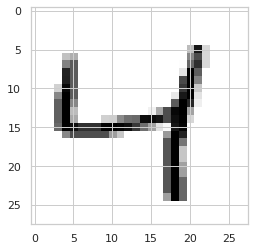

In [9]:
# Example of a single sample, a 28x28 pixel image of a handwritten digit
digit = example_train_images[2]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

####Prepare the data

In [0]:
# Reshape the data into the shape that the network expects
train_images = train_images.reshape((60000, 28 * 28))

# Scale the data to [0,1] interval
train_images = train_images.astype('float32') / 255

# Do the same for the test dataset
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
# Split training data into training set and validation set
val_images, train_images = train_images[:5000], train_images[5000:]
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

#Experiment 3

We will fine-tune the hyperparameters of the model until we find the 'best' model according to our selected metrics

In [0]:
# Function builds models with 1 hidden layer (by default), then the same number of nodes in each hidden layer
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(n_hidden=2, n_neurons=2, learning_rate=0.001, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dropout(0.25))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [0]:
# This function builds models with varying number of nodes in each hidden layer
def build_model2(n_neurons=(2,3), learning_rate=0.001, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(len(n_neurons)):
        model.add(keras.layers.Dense(n_neurons[layer], activation="relu"))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
keras_clf = KerasClassifier(build_model)

In [23]:
param_grid = {'n_neurons': range(70,91)}
param_grid

{'n_neurons': range(70, 91)}

Use grid search to train models with different combinations of parameter values

In [24]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=keras_clf, param_grid=param_grid,cv=3,verbose = 2)
grid_cv.fit(train_images, train_labels, epochs=30,
                  validation_data=(val_images, val_labels),
                  callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Fitting 3 folds for each of 21 candidates, totalling 63 fits
[CV] n_neurons=70 ....................................................
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 36666 samples, validate on 5000 samples
Epoch 1/30
36666/36666 [==============================] - 3s 73us/sample - loss: 0.4094 - accuracy: 0.8769 - val_loss: 0.1817 - val_accuracy: 0.9478
Epoch 2/30
36666/36666 [==============================] - 3s 72us/sample - loss: 0.1864 - accuracy: 0.9444 - val_loss: 0.1412 - val_accuracy: 0.9586
Epoch 3/30
36666/36666 [==============================] - 3s 72us/sample - loss: 0.1355 - accuracy: 0.9597 - val_loss: 0.1153 - val_accuracy: 0.9626
Epoch 4/30
36666/36666 [==============================] - 3s 73us/sample - loss: 0.1064 - accuracy: 0.9668 - val_loss: 0.1082 - val_accuracy: 0.9656
Epoch 5/30
36666/36666 [==============================] - 3s 73us/sample - loss: 0.0924 - accuracy: 0.9717 - val_loss: 0.1078 - val_accuracy: 0.9666
Epoch 6/30
36666/36666 [==============================] - 3s 73us/sample - loss: 0.0753 - accuracy: 0.9760 - val_loss: 0.0967 - val_accuracy: 0.9706
Epoch 7/30
36666/36666 [==============================] -

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.2s remaining:    0.0s


Train on 36667 samples, validate on 5000 samples
Epoch 1/30
36667/36667 [==============================] - 3s 76us/sample - loss: 0.3966 - accuracy: 0.8835 - val_loss: 0.1770 - val_accuracy: 0.9508
Epoch 2/30
36667/36667 [==============================] - 3s 74us/sample - loss: 0.1788 - accuracy: 0.9486 - val_loss: 0.1348 - val_accuracy: 0.9606
Epoch 3/30
36667/36667 [==============================] - 3s 73us/sample - loss: 0.1318 - accuracy: 0.9606 - val_loss: 0.1137 - val_accuracy: 0.9656
Epoch 4/30
36667/36667 [==============================] - 3s 74us/sample - loss: 0.1047 - accuracy: 0.9688 - val_loss: 0.0985 - val_accuracy: 0.9716
Epoch 5/30
36667/36667 [==============================] - 3s 73us/sample - loss: 0.0876 - accuracy: 0.9733 - val_loss: 0.0932 - val_accuracy: 0.9722
Epoch 6/30
36667/36667 [==============================] - 3s 74us/sample - loss: 0.0740 - accuracy: 0.9763 - val_loss: 0.0955 - val_accuracy: 0.9730
Epoch 7/30
36667/36667 [==============================] -

[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed: 30.9min finished


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 122us/sample - loss: 0.3177 - accuracy: 0.9058 - val_loss: 0.1285 - val_accuracy: 0.9648
Epoch 2/30
55000/55000 [==============================] - 5s 98us/sample - loss: 0.1428 - accuracy: 0.9569 - val_loss: 0.0996 - val_accuracy: 0.9692
Epoch 3/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.1037 - accuracy: 0.9687 - val_loss: 0.0971 - val_accuracy: 0.9692
Epoch 4/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.0815 - accuracy: 0.9748 - val_loss: 0.0748 - val_accuracy: 0.9778
Epoch 5/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.0684 - accuracy: 0.9786 - val_loss: 0.0766 - val_accuracy: 0.9774
Epoch 6/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.0562 - accuracy: 0.9819 - val_loss: 0.0803 - val_accuracy: 0.9754


GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff208161048>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_neurons': range(70, 91)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=2)

##EVALUATE

### Inspecting the best estimator

Let's get the number of neurons that produced the best estimator

In [25]:
grid_cv.best_params_

{'n_neurons': 85}

Let's get the rsults to compare the performance of the 100 models.

In [26]:
results = grid_cv.cv_results_
results

{'mean_fit_time': array([25.20166866, 31.44030031, 26.11247094, 25.91571649, 21.72429895,
        22.43662429, 23.09575963, 28.6053954 , 24.23076495, 27.85783259,
        24.13638242, 30.15004118, 30.68927765, 30.38528752, 27.46617667,
        35.10046419, 32.00741116, 28.9406658 , 37.00933886, 32.79053108,
        34.56085149]),
 'mean_score_time': array([0.62289786, 0.66153924, 0.6606528 , 0.67948643, 0.71106982,
        0.7223796 , 0.74161275, 0.76643292, 0.7746373 , 0.81428274,
        0.83049393, 0.85004385, 0.87253197, 0.88953956, 0.9072419 ,
        0.93682861, 0.96890807, 0.97520947, 1.00491532, 1.03551006,
        1.05130943]),
 'mean_test_score': array([0.9701636 , 0.97038182, 0.96963636, 0.9683637 , 0.96783634,
        0.96636355, 0.96900002, 0.96970908, 0.96805455, 0.96805453,
        0.96869095, 0.96861817, 0.96999997, 0.96807261, 0.9679454 ,
        0.97065453, 0.97001823, 0.96932729, 0.97005449, 0.96998179,
        0.96952724]),
 'param_n_neurons': masked_array(data=[70,

In [27]:
results['params'], results['rank_test_score']

([{'n_neurons': 70},
  {'n_neurons': 71},
  {'n_neurons': 72},
  {'n_neurons': 73},
  {'n_neurons': 74},
  {'n_neurons': 75},
  {'n_neurons': 76},
  {'n_neurons': 77},
  {'n_neurons': 78},
  {'n_neurons': 79},
  {'n_neurons': 80},
  {'n_neurons': 81},
  {'n_neurons': 82},
  {'n_neurons': 83},
  {'n_neurons': 84},
  {'n_neurons': 85},
  {'n_neurons': 86},
  {'n_neurons': 87},
  {'n_neurons': 88},
  {'n_neurons': 89},
  {'n_neurons': 90}],
 array([ 3,  2,  9, 15, 20, 21, 12,  8, 17, 18, 13, 14,  6, 16, 19,  1,  5,
        11,  4,  7, 10], dtype=int32))

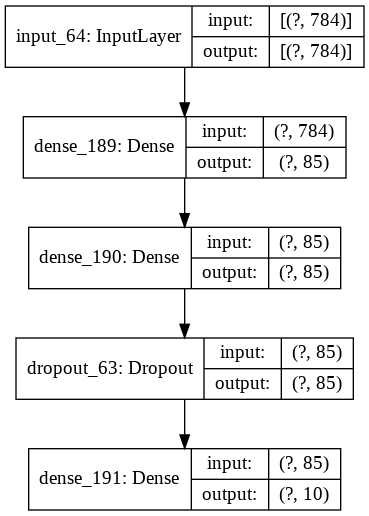

In [28]:
best_model = grid_cv.best_estimator_.model
keras.utils.plot_model(best_model, show_shapes=True)

In [29]:
best_model.evaluate(test_images, test_labels)

[0.08306208098918433, 0.9775]